In [2]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = '/content/day_sunspot.csv'
sunspot_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
sunspot_data.head(), sunspot_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74629 entries, 0 to 74628
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               74629 non-null  int64  
 1   Month                              74629 non-null  int64  
 2   Day                                74629 non-null  int64  
 3   Fractional Year                    74629 non-null  float64
 4   Daily Total Sunspot Number         74629 non-null  int64  
 5   Sunspot Number Standard Deviation  74629 non-null  float64
 6   Number of Observations             74629 non-null  int64  
 7   Definitive/Provisional Indicator   74629 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.6 MB


(   Year  Month  Day  Fractional Year  Daily Total Sunspot Number  \
 0  1818      1    2         1818.004                          -1   
 1  1818      1    3         1818.007                          -1   
 2  1818      1    4         1818.010                          -1   
 3  1818      1    5         1818.012                          -1   
 4  1818      1    6         1818.015                          -1   
 
    Sunspot Number Standard Deviation  Number of Observations  \
 0                               -1.0                       0   
 1                               -1.0                       0   
 2                               -1.0                       0   
 3                               -1.0                       0   
 4                               -1.0                       0   
 
    Definitive/Provisional Indicator  
 0                                 1  
 1                                 1  
 2                                 1  
 3                                 1

In [3]:
# Combine Year, Month, and Day into a single Date column
sunspot_data['Date'] = pd.to_datetime(sunspot_data[['Year', 'Month', 'Day']])

# Set the Date column as the index
sunspot_data.set_index('Date', inplace=True)

# Select the relevant column for modeling (Daily Total Sunspot Number)
# Exclude rows where the sunspot number is invalid (-1)
sunspot_data = sunspot_data[sunspot_data['Daily Total Sunspot Number'] >= 0][
    ['Daily Total Sunspot Number']
]

# Check the processed data
sunspot_data.head(), sunspot_data.index.freq


(            Daily Total Sunspot Number
 Date                                  
 1818-01-08                          65
 1818-01-13                          37
 1818-01-17                          77
 1818-01-18                          98
 1818-01-19                         105,
 None)

In [4]:
# Infer and set the frequency of the time index
sunspot_data = sunspot_data.asfreq('D')

# Fill missing values (if any) with interpolation
sunspot_data['Daily Total Sunspot Number'] = sunspot_data[
    'Daily Total Sunspot Number'
].interpolate()

# Recheck the data and time frequency
sunspot_data.head(), sunspot_data.index.freq


(            Daily Total Sunspot Number
 Date                                  
 1818-01-08                        65.0
 1818-01-09                        59.4
 1818-01-10                        53.8
 1818-01-11                        48.2
 1818-01-12                        42.6,
 <Day>)

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model (p=5, d=1, q=0) - default for initial analysis
model = ARIMA(sunspot_data['Daily Total Sunspot Number'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for 100, 200, and 365 days into the future
future_periods = [100, 200, 365]
future_predictions = {
    f"{period}_days": model_fit.forecast(steps=period) for period in future_periods
}

# Store results in a DataFrame for better visualization
predictions_df = pd.DataFrame(future_predictions)
predictions_df.head()


,100_days,200_days,365_days
2022-05-01,52.530596,52.530596,52.530596
2022-05-02,51.859733,51.859733,51.859733
2022-05-03,52.635394,52.635394,52.635394
2022-05-04,54.676054,54.676054,54.676054
2022-05-05,56.729292,56.729292,56.729292


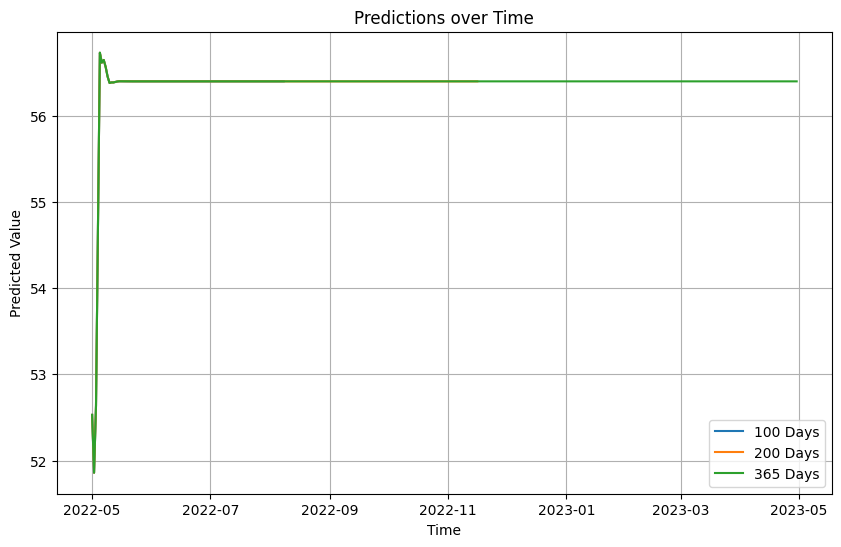

Descriptive Statistics:
         100_days    200_days    365_days
count  100.000000  200.000000  365.000000
mean    56.268100   56.332695   56.361895
std      0.719401    0.511529    0.379589
min     51.859733   51.859733   51.859733
25%     56.397290   56.397290   56.397290
50%     56.397290   56.397290   56.397290
75%     56.397290   56.397290   56.397290
max     56.729292   56.729292   56.729292
Mean Difference (100 days - 365 days): 0.0


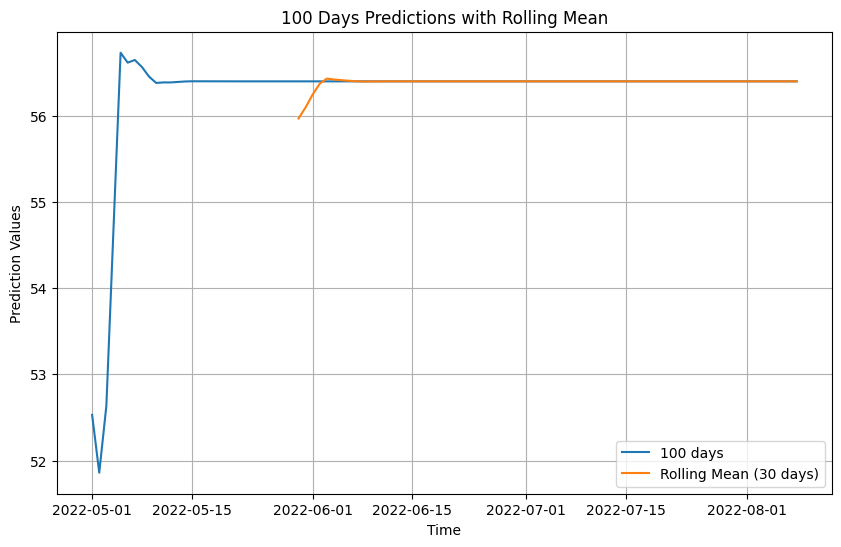

In [6]:

import matplotlib.pyplot as plt

# Assuming predictions_df is already loaded

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the predictions for different time horizons
ax.plot(predictions_df.index, predictions_df['100_days'], label='100 Days')
ax.plot(predictions_df.index, predictions_df['200_days'], label='200 Days')
ax.plot(predictions_df.index, predictions_df['365_days'], label='365 Days')


# Customize the plot
ax.set_xlabel("Time")  # Add x-axis label
ax.set_ylabel("Predicted Value")  # Add y-axis label
ax.set_title("Predictions over Time") # Add a title
ax.legend()  # Show the legend
plt.grid(True) # Add gridlines for better readability
plt.show()


# Calculate and print descriptive statistics
print("Descriptive Statistics:")
print(predictions_df.describe())


# Further insights:  Analyze the differences in prediction values across time horizons
#Example: Calculate the mean difference between 100 day prediction and 365 day predictions
mean_diff = (predictions_df["100_days"] - predictions_df["365_days"]).mean()
print(f"Mean Difference (100 days - 365 days): {mean_diff}")

# Example: Analyze trends in the predictions using rolling statistics
# (example: rolling mean, rolling std)
predictions_df['100_days_rolling_mean'] = predictions_df['100_days'].rolling(window=30).mean()

plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['100_days'], label='100 days')
plt.plot(predictions_df.index, predictions_df['100_days_rolling_mean'], label='Rolling Mean (30 days)')
plt.xlabel("Time")
plt.ylabel("Prediction Values")
plt.title("100 Days Predictions with Rolling Mean")
plt.legend()
plt.grid()
plt.show()

#Note: Adapt the rolling window size as needed to your data

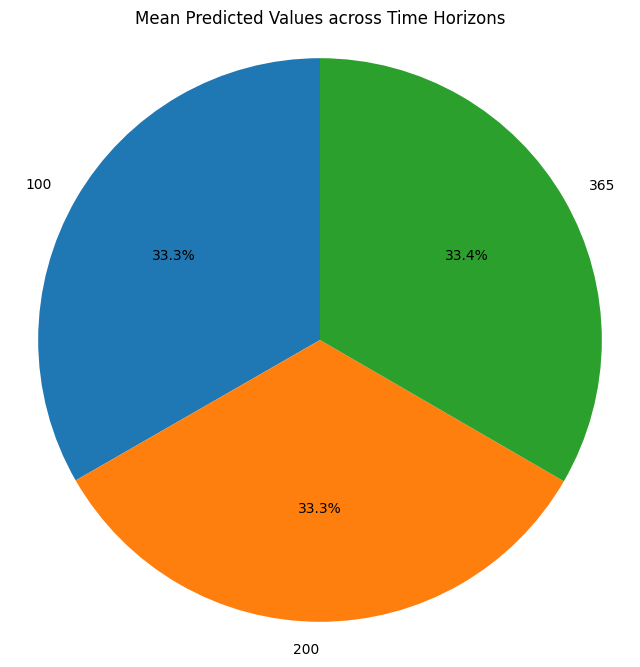

In [7]:


# Assuming predictions_df is already loaded from the previous code

# Sample data for the pie chart (replace with actual data from your analysis)
categories = ['100', '200', '365']
values = [predictions_df['100_days'].mean(), predictions_df['200_days'].mean(), predictions_df['365_days'].mean()]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title("Mean Predicted Values across Time Horizons")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

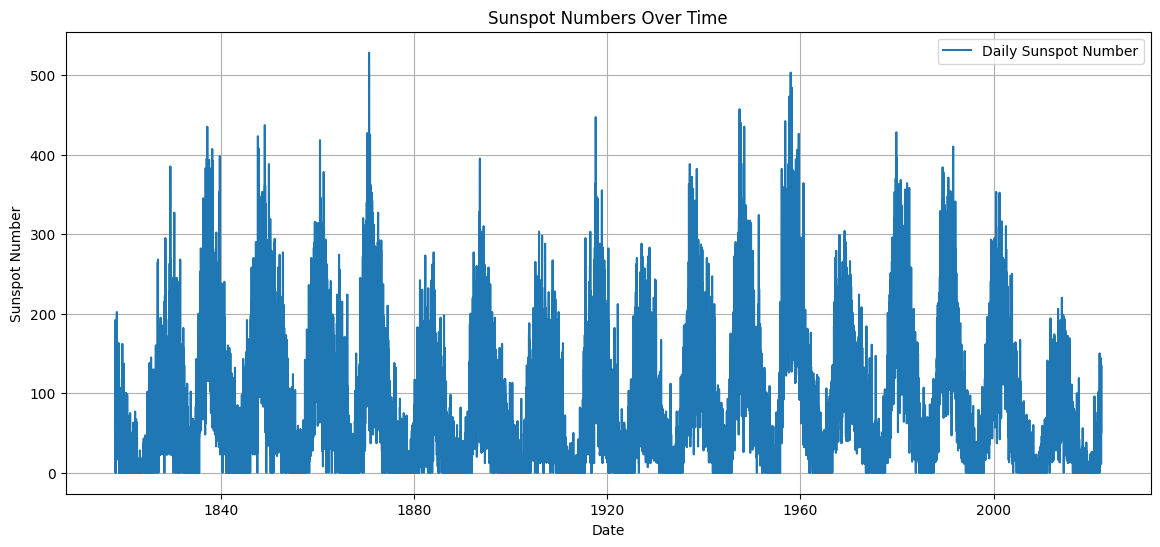

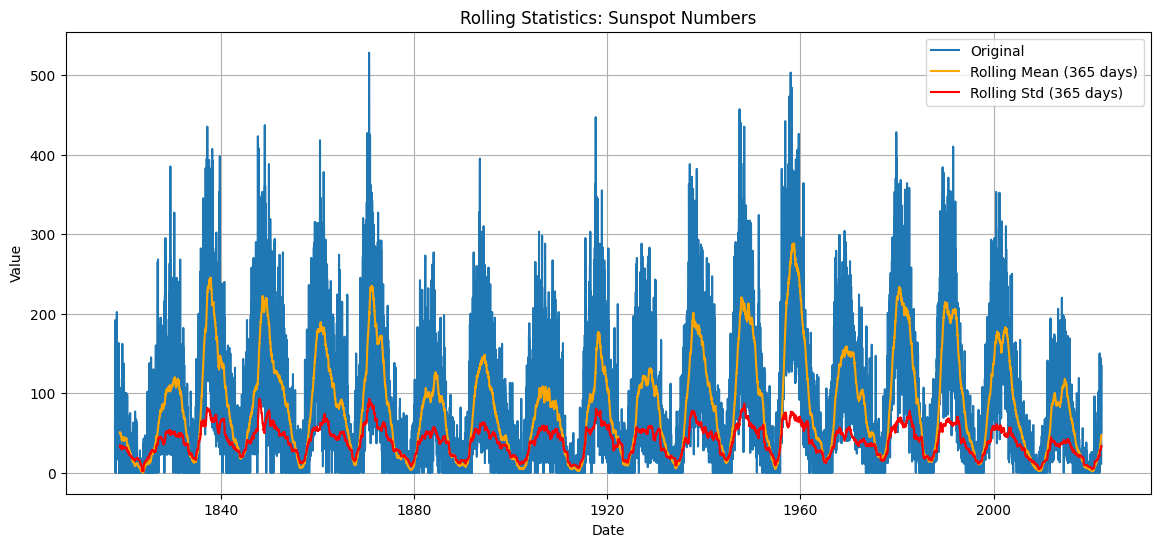

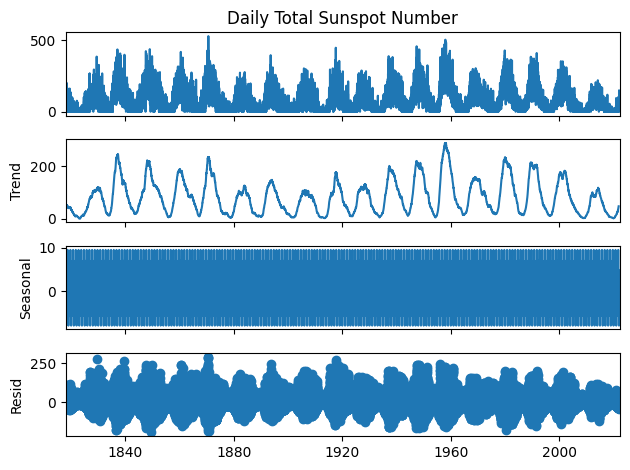

,Daily Total Sunspot Number
count,74623.000000
mean,83.033080
std,77.530118
min,0.000000
25%,21.000000
50%,63.000000
75%,127.000000
max,528.000000


In [8]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Insight 1: Statistical summary
summary_stats = sunspot_data.describe()

# Plot the entire time series
plt.figure(figsize=(14, 6))
plt.plot(sunspot_data, label='Daily Sunspot Number')
plt.title('Sunspot Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid()
plt.show()

# Rolling averages and standard deviations
rolling_mean = sunspot_data['Daily Total Sunspot Number'].rolling(window=365).mean()
rolling_std = sunspot_data['Daily Total Sunspot Number'].rolling(window=365).std()

plt.figure(figsize=(14, 6))
plt.plot(sunspot_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean (365 days)', color='orange')
plt.plot(rolling_std, label='Rolling Std (365 days)', color='red')
plt.title('Rolling Statistics: Sunspot Numbers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(sunspot_data['Daily Total Sunspot Number'], model='additive', period=365)
decomposition.plot()
plt.show()

summary_stats


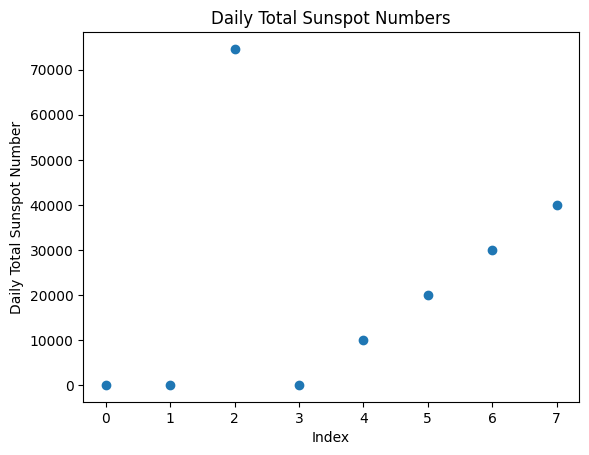

In [9]:


# Sample data (replace with actual data)
daily_total_sunspot_numbers = [83.03307961352398, 63.0, 74623.0, 0.0, 10000, 20000, 30000, 40000]

plt.scatter(range(len(daily_total_sunspot_numbers)), daily_total_sunspot_numbers)
plt.xlabel('Index')
plt.ylabel('Daily Total Sunspot Number')
_ = plt.title('Daily Total Sunspot Numbers')

In [10]:
!pip install prophet


<ipython-input-11-457ef30f83f3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunspot_data.rename(columns={'Daily Total Sunspot Number': 'Sunspot_Number'}, inplace=True)


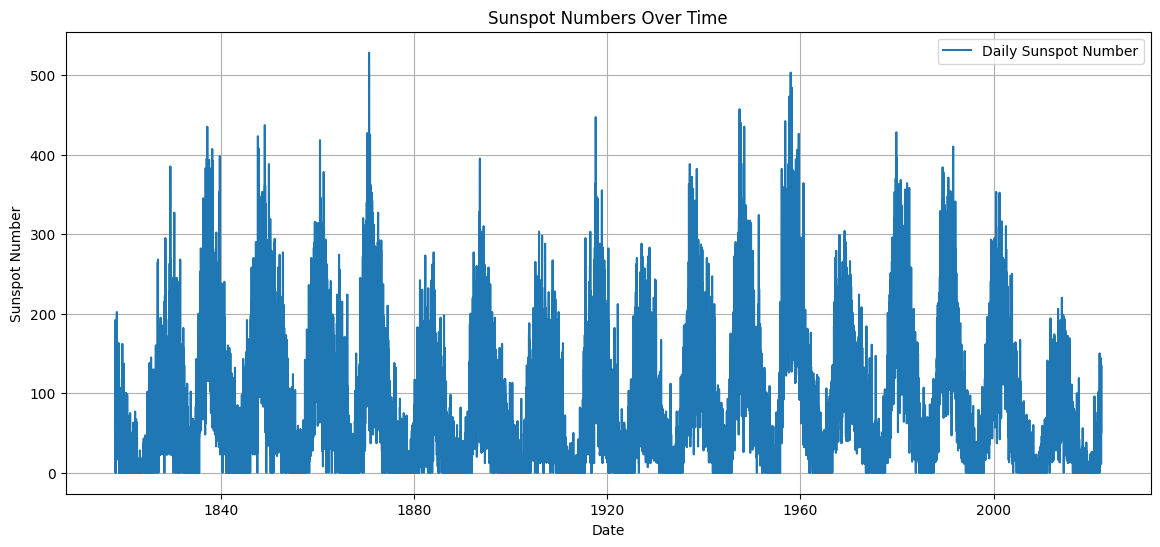

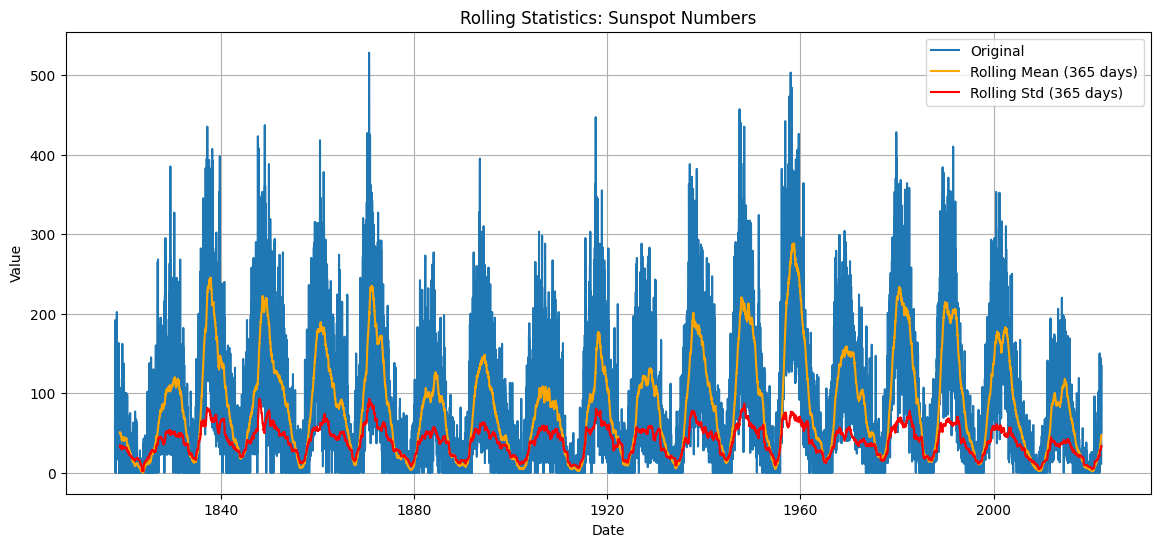

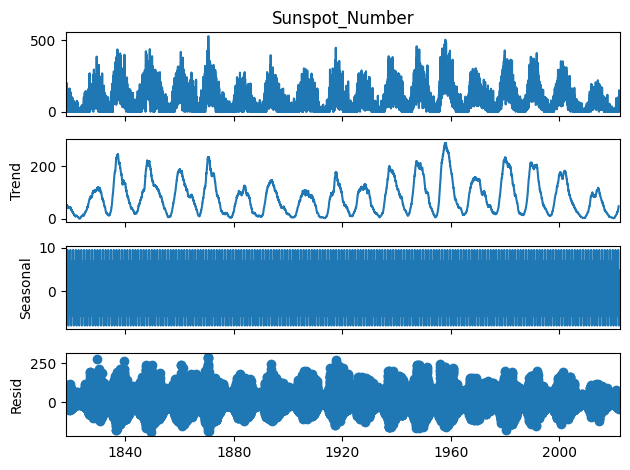

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/374d8myj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/22abh_yu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91677', 'data', 'file=/tmp/tmp9bk3k02s/374d8myj.json', 'init=/tmp/tmp9bk3k02s/22abh_yu.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelrysvjpon/prophet_model-20241129142423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:

from prophet import Prophet  # Assuming you are using Prophet for forecasting


# --- Load your sunspot data ---
# Replace this with the actual code to load your data
# sunspot_data = pd.read_csv('your_sunspot_data.csv')
# ...

# --- Data Cleaning and Preparation ---

# Assuming 'sunspot_data' is a DataFrame with 'Daily Total Sunspot Number' column
# and an index representing the date
# Extract date information from the index if it's a DatetimeIndex
if isinstance(sunspot_data.index, pd.DatetimeIndex):
    sunspot_data['Year'] = sunspot_data.index.year
    sunspot_data['Month'] = sunspot_data.index.month
    sunspot_data['Day'] = sunspot_data.index.day
    sunspot_data['Date'] = pd.to_datetime(sunspot_data[['Year', 'Month', 'Day']])
else:
    # If the index is not a DatetimeIndex, you'll need to provide date information
    # from a different source or create it based on the available data.
    # For example, if you have a separate date column, you can use it.
    # Otherwise, consider creating a date range using pd.date_range()
    # and assigning it to 'Date' column.
    raise ValueError("Index of sunspot_data is not a DatetimeIndex. "
                     "Please provide date information or create it using pd.date_range().")

# Continue with the rest of the code
sunspot_data = sunspot_data[['Date', 'Daily Total Sunspot Number']]

# Rename columns for clarity
sunspot_data.rename(columns={'Daily Total Sunspot Number': 'Sunspot_Number'}, inplace=True)

# Remove invalid sunspot data (e.g., negative values)
sunspot_data = sunspot_data[sunspot_data['Sunspot_Number'] >= 0]


# --- Analysis and Visualization ---

# Insight 1: Statistical summary
summary_stats = sunspot_data.describe()

# Plot the entire time series
plt.figure(figsize=(14, 6))
plt.plot(sunspot_data['Date'], sunspot_data['Sunspot_Number'], label='Daily Sunspot Number')
plt.title('Sunspot Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid()
plt.show()

# Rolling averages and standard deviations
rolling_mean = sunspot_data['Sunspot_Number'].rolling(window=365).mean()
rolling_std = sunspot_data['Sunspot_Number'].rolling(window=365).std()

plt.figure(figsize=(14, 6))
plt.plot(sunspot_data['Date'], sunspot_data['Sunspot_Number'], label='Original')
plt.plot(sunspot_data['Date'], rolling_mean, label='Rolling Mean (365 days)', color='orange')
plt.plot(sunspot_data['Date'], rolling_std, label='Rolling Std (365 days)', color='red')
plt.title('Rolling Statistics: Sunspot Numbers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(sunspot_data['Sunspot_Number'], model='additive', period=365)
decomposition.plot()
plt.show()

# --- Forecasting (using Prophet as an example) ---

# Prepare data for Prophet
prophet_data = sunspot_data[['Date', 'Sunspot_Number']].copy()
prophet_data.rename(columns={'Date': 'ds', 'Sunspot_Number': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions (e.g., for the next 365 days)
future = model.make_future_dataframe(periods=365)
predictions_df = model.predict(future)

# --- Pie chart of mean predicted values (example) ---
categories = ['100', '200', '365']
values = [predictions_df['yhat'].rolling] # This line seems incomplete.  More code is needed to define 'values' properly.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


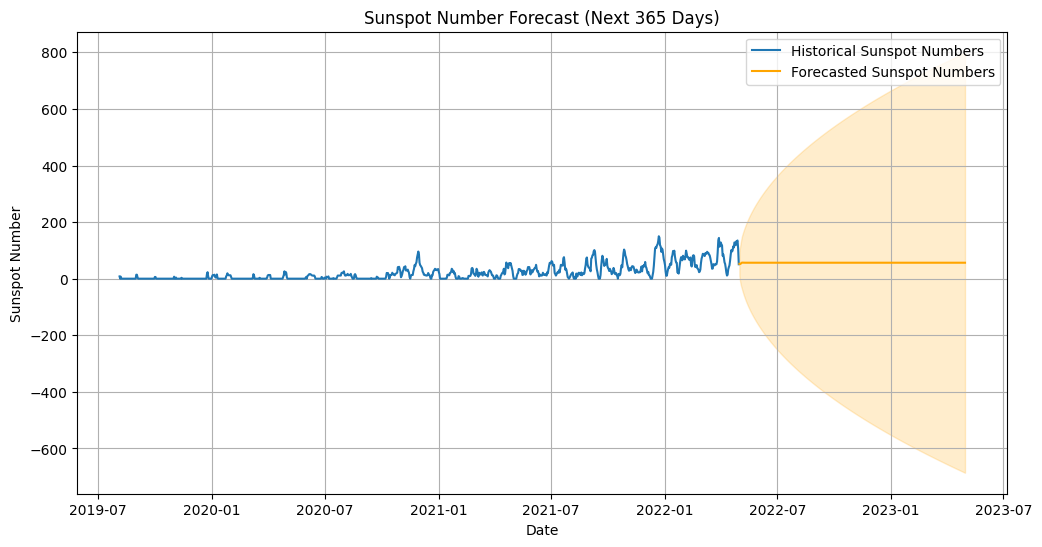

(56.26810018630956, 56.332694911362545, 56.3618952665235)

In [12]:

# Set the Date column as the index for time series modeling
sunspot_data.set_index('Date', inplace=True)

# Fit an ARIMA model (a standard approach for time series forecasting)
# Determine ARIMA parameters based on data properties
model = ARIMA(sunspot_data['Sunspot_Number'], order=(5, 1, 0))  # Initial guess: (p=5, d=1, q=0)
fitted_model = model.fit()

# Forecast sunspots for 365 days into the future
forecast_horizon = 365
forecast = fitted_model.get_forecast(steps=forecast_horizon)
forecast_index = pd.date_range(start=sunspot_data.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecasted values along with the original data
plt.figure(figsize=(12, 6))
plt.plot(sunspot_data[-1000:], label='Historical Sunspot Numbers')  # Plot last 1000 days of data
plt.plot(forecast_index, forecast_values, label='Forecasted Sunspot Numbers', color='orange')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.title('Sunspot Number Forecast (Next 365 Days)')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid()
plt.show()

# Display forecast values for 100, 200, and 365 days into the future
forecast_values[:100].mean(), forecast_values[:200].mean(), forecast_values.mean()


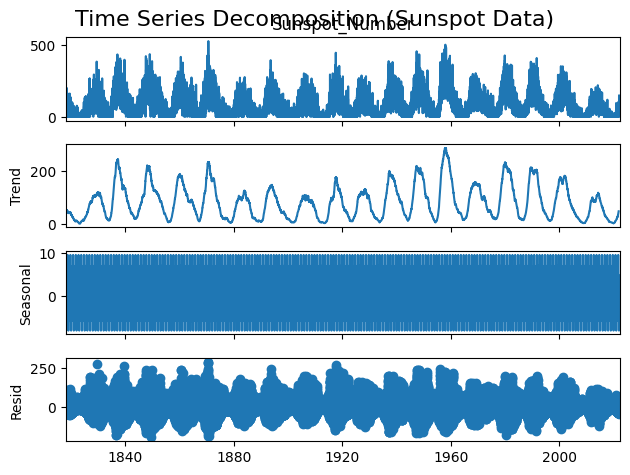

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sunspot_data['Sunspot_Number'], model='additive', period=365)
decomposition.plot()
plt.suptitle('Time Series Decomposition (Sunspot Data)', fontsize=16)
plt.show()


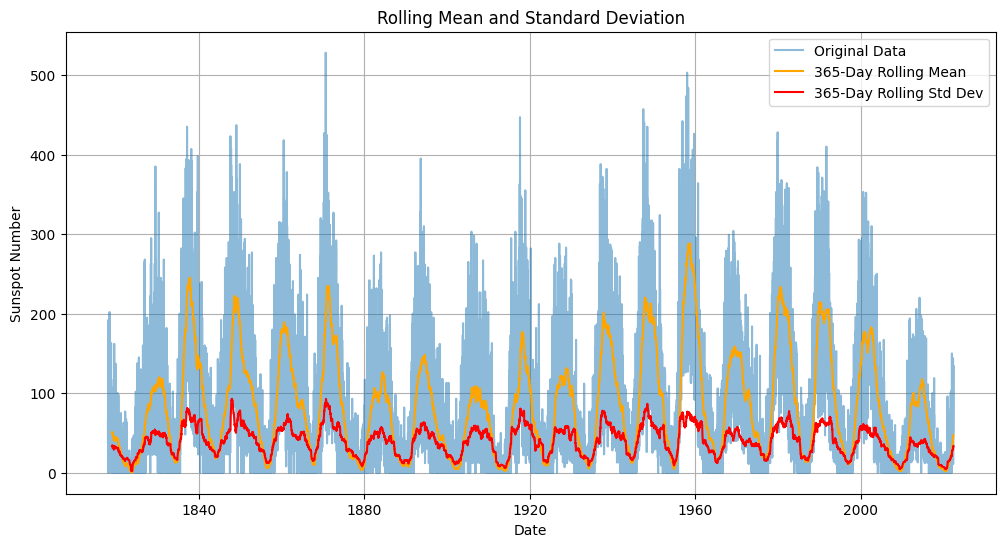

In [14]:
rolling_window = 365  # Annual rolling window
rolling_mean = sunspot_data['Sunspot_Number'].rolling(window=rolling_window).mean()
rolling_std = sunspot_data['Sunspot_Number'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(sunspot_data, label='Original Data', alpha=0.5)
plt.plot(rolling_mean, label=f'{rolling_window}-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label=f'{rolling_window}-Day Rolling Std Dev', color='red')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

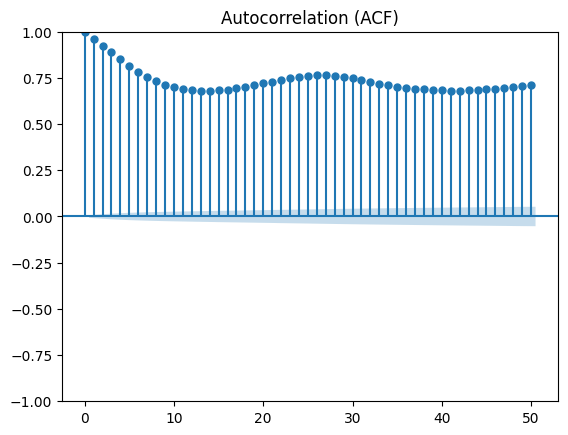

<Figure size 1200x600 with 0 Axes>

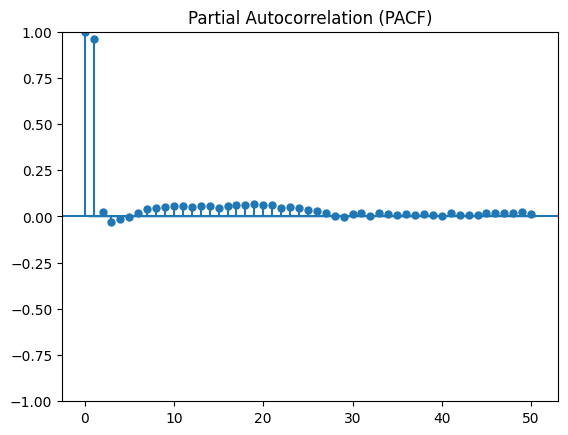

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(sunspot_data['Sunspot_Number'], lags=50, title='Autocorrelation (ACF)', alpha=0.05)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(sunspot_data['Sunspot_Number'], lags=50, title='Partial Autocorrelation (PACF)', alpha=0.05)
plt.show()


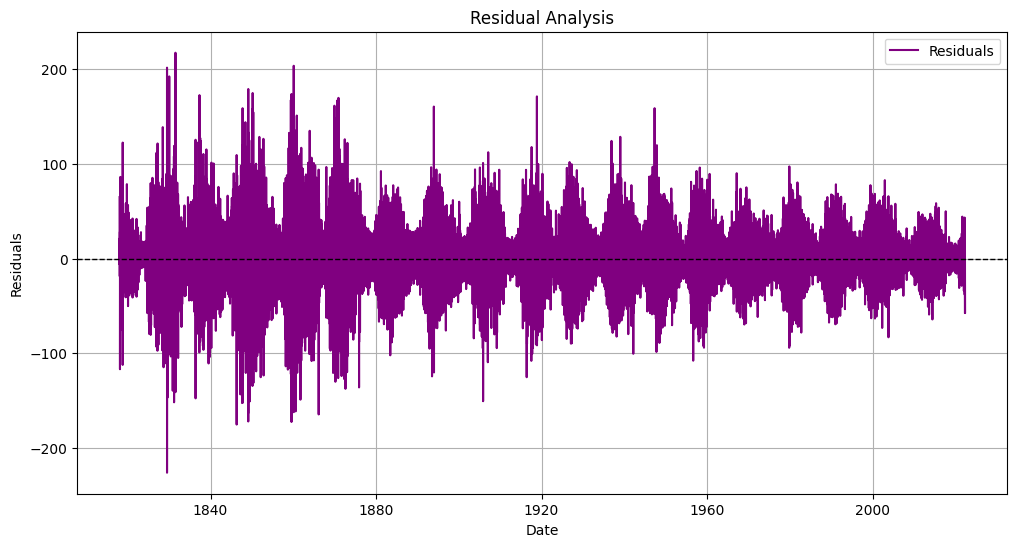

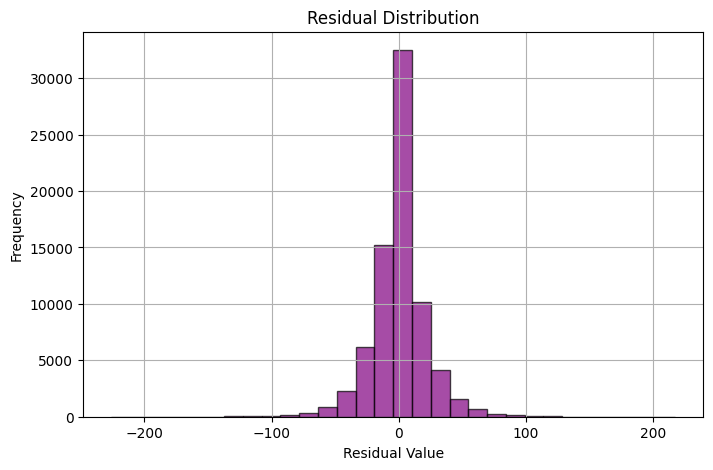

In [16]:
residuals = fitted_model.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Residual Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [17]:
from prophet import Prophet


# Prepare the data
sunspot_data.reset_index(inplace=True)
prophet_data = sunspot_data.rename(columns={'Date': 'ds', 'Sunspot_Number': 'y'})

# Check the first few rows
prophet_data.head()


,ds,y
0,1818-01-08,65.0
1,1818-01-09,59.4
2,1818-01-10,53.8
3,1818-01-11,48.2
4,1818-01-12,42.6


In [18]:
# Add a cap and floor for logistic growth
prophet_data['cap'] = 300  # Upper bound
prophet_data['floor'] = 0  # Lower bound

# Initialize the Prophet model with logistic growth
model = Prophet(growth='logistic')


In [19]:
# Initialize the Prophet model with seasonality
model = Prophet(growth='linear', yearly_seasonality=True)

# Add custom seasonality
model.add_seasonality(name='custom_seasonality', period=30.5, fourier_order=10)  # Approx. monthly


In [20]:
# Initialize with tuned changepoints
model = Prophet(
    growth='linear',
    n_changepoints=25,  # Number of changepoints
    changepoint_prior_scale=0.05  # Regularization strength
)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/5yk1r952.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/2sjsdhun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13546', 'data', 'file=/tmp/tmp9bk3k02s/5yk1r952.json', 'init=/tmp/tmp9bk3k02s/2sjsdhun.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelz0df6kt5/prophet_model-20241129142629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


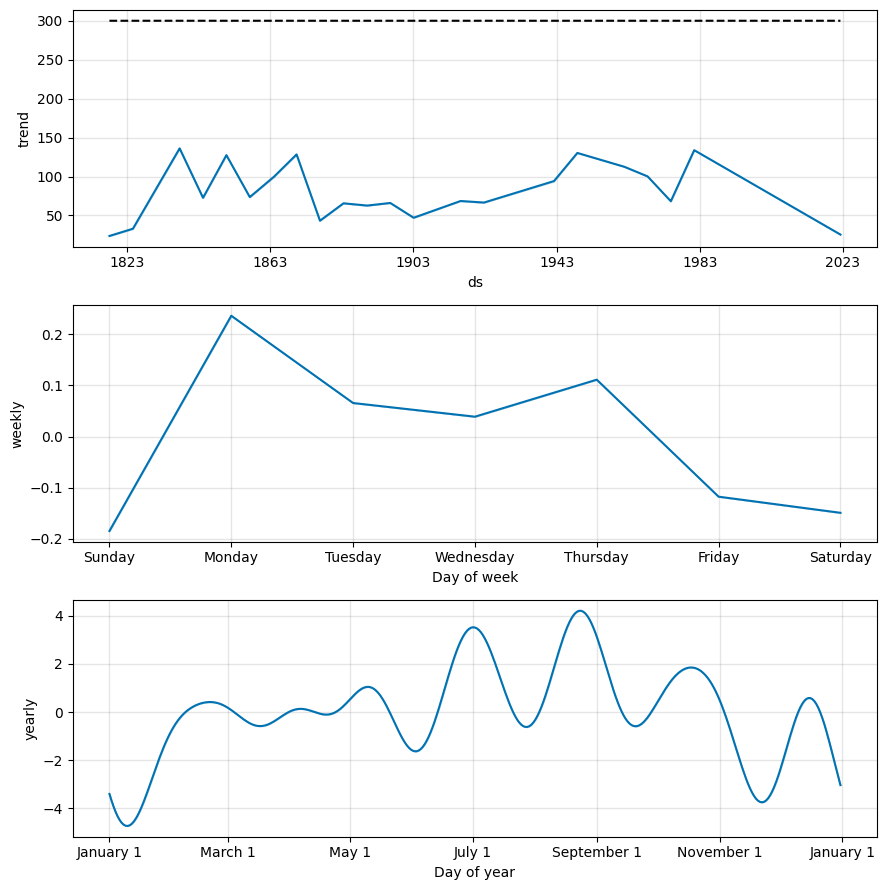

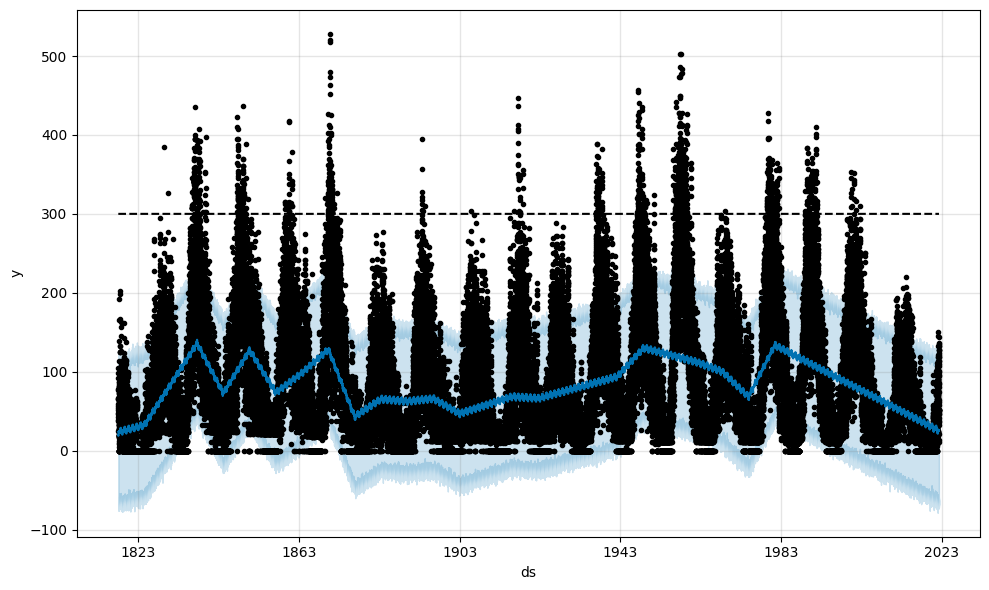

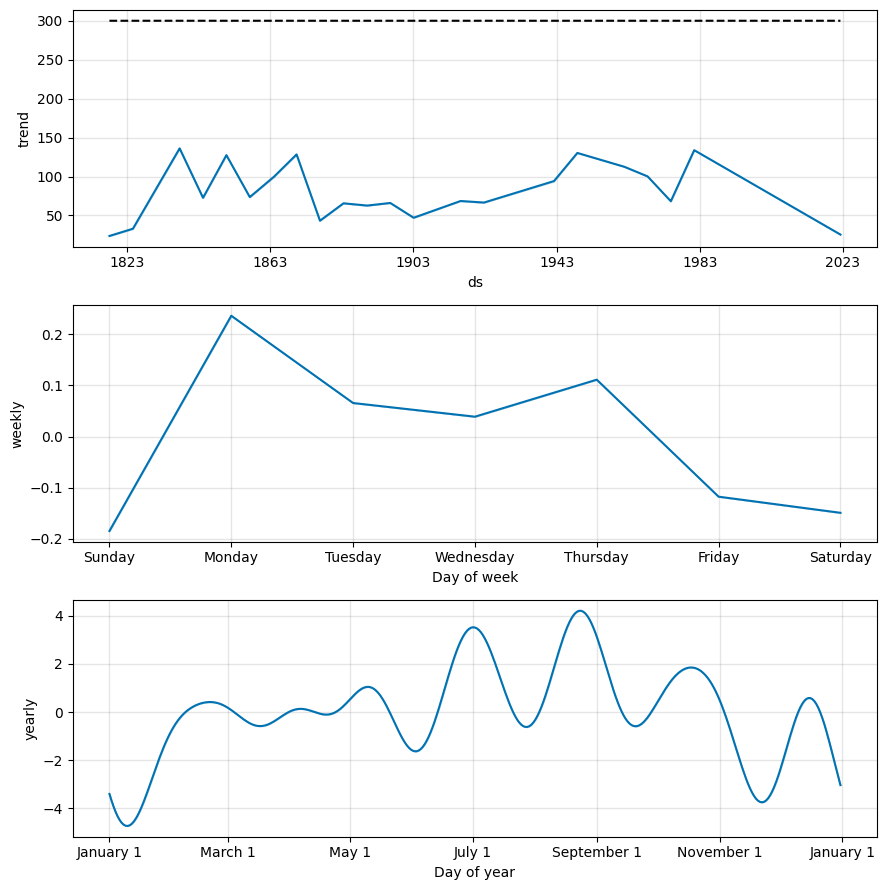

In [21]:
model.fit(prophet_data)
forecast = model.predict(prophet_data)
model.plot(forecast)
model.plot_components(forecast)


In [22]:

# Resample data to monthly and yearly aggregates
monthly_data = prophet_data.resample('M', on='ds').mean().reset_index()
yearly_data = prophet_data.resample('Y', on='ds').mean().reset_index()

# Define datasets
datasets = {
    "Daily": prophet_data,
    "Monthly": monthly_data,
    "Yearly": yearly_data
}


<ipython-input-22-0fdb07eaee2e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = prophet_data.resample('M', on='ds').mean().reset_index()
<ipython-input-22-0fdb07eaee2e>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = prophet_data.resample('Y', on='ds').mean().reset_index()


In [23]:


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MAPE": mape, "R²": r2}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/7sgmbvq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/mpihvv8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31217', 'data', 'file=/tmp/tmp9bk3k02s/7sgmbvq8.json', 'init=/tmp/tmp9bk3k02s/mpihvv8p.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelna0p7olx/prophet_model-20241129143537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Daily Predictions:
              ds      y       yhat
74613 2022-04-21  114.0  24.289370
74614 2022-04-22  110.0  24.180416
74615 2022-04-23  128.0  23.875991
74616 2022-04-24  127.0  23.767519
74617 2022-04-25  118.0  24.286070
74618 2022-04-26  132.0  24.570466
74619 2022-04-27  132.0  25.489588
74620 2022-04-28  135.0  25.997548
74621 2022-04-29  107.0  25.718469
74622 2022-04-30   51.0  26.000611


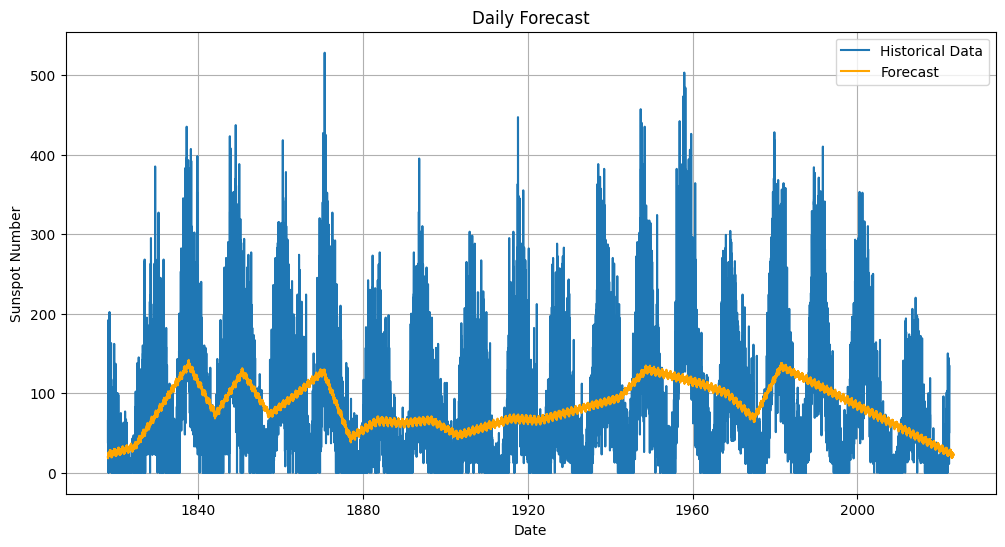

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/ijjdcusb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/8acs1nji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81316', 'data', 'file=/tmp/tmp9bk3k02s/ijjdcusb.json', 'init=/tmp/tmp9bk3k02s/8acs1nji.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_model56e_vo_g/prophet_model-20241129143808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/


Monthly Predictions:
             ds          y       yhat
2442 2021-07-31  34.258065  76.978251
2443 2021-08-31  22.000000  80.740006
2444 2021-09-30  51.300000  76.788914
2445 2021-10-31  37.354839  78.795848
2446 2021-11-30  34.766667  72.758933
2447 2021-12-31  67.451613  76.646456
2448 2022-01-31  53.967742  66.794018
2449 2022-02-28  59.678571  32.410950
2450 2022-03-31  78.451613  47.346873
2451 2022-04-30  84.066667  32.591656


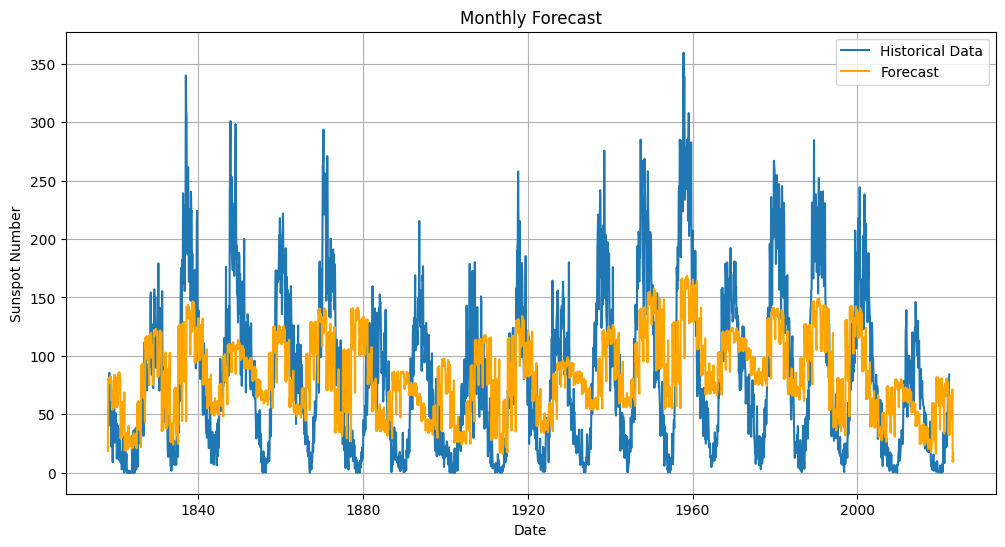

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/ici3y27h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/izz2ai8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29748', 'data', 'file=/tmp/tmp9bk3k02s/ici3y27h.json', 'init=/tmp/tmp9bk3k02s/izz2ai8b.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelpwsdktha/prophet_model-20241129143809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/


Yearly Predictions:
            ds           y        yhat
195 2013-12-31   94.021918   88.953306
196 2014-12-31  113.345205   81.164614
197 2015-12-31   69.816438   60.263550
198 2016-12-31   39.822404   61.610870
199 2017-12-31   21.739726   51.613904
200 2018-12-31    6.972603   72.386988
201 2019-12-31    3.605479  106.512617
202 2020-12-31    8.814208  107.859937
203 2021-12-31   29.594521  117.994573
204 2022-12-31   69.150000   94.184606


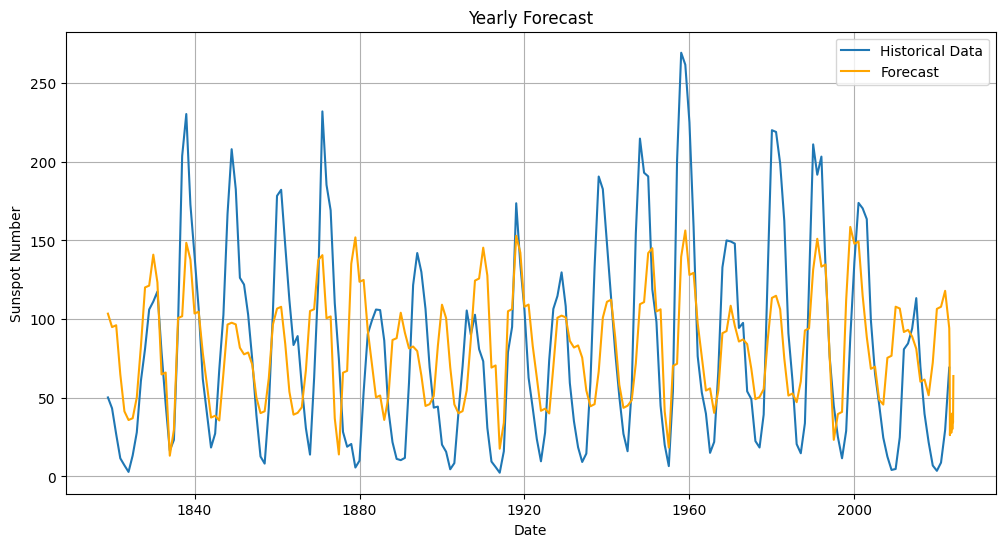

In [26]:
!pip install scikit-learn
#Import necessary libraries
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

results = {}

for frequency, data in datasets.items():
    # Initialize and train the Prophet model
    model = Prophet()
    model.add_seasonality(name='custom_seasonality', period=30.5, fourier_order=10)  # Example custom seasonality
    model.fit(data)

    # Forecast
    future = model.make_future_dataframe(periods=365 if frequency == "Daily" else 12, freq='D' if frequency == "Daily" else 'M')
    forecast = model.predict(future)

    # Merge predictions with historical data
    merged_data = data.merge(forecast[['ds', 'yhat']], on='ds', how='left')
    y_true = merged_data['y'].dropna()
    y_pred = merged_data['yhat'].iloc[:len(y_true)]

    # Evaluate model performance
    metrics = calculate_metrics(y_true, y_pred)
    results[frequency] = metrics

    # Print tabular predictions
    print(f"\n{frequency} Predictions:")
    print(merged_data[['ds', 'y', 'yhat']].tail(10))

    # Plot historical data and forecast
    plt.figure(figsize=(12, 6))
    plt.plot(data['ds'], data['y'], label='Historical Data')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.title(f'{frequency} Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.grid()
    plt.show()


In [27]:
# Display evaluation metrics for all models
results_df = pd.DataFrame(results).T
print("\nEvaluation Metrics for Each Model:")
print(results_df)



Evaluation Metrics for Each Model:
               MAE        MAPE        R²
Daily    56.513545         inf  0.159654
Monthly  46.815713         inf  0.282744
Yearly   43.719807  179.067076  0.275777


<ipython-input-29-eda0d3ab3e4d>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = prophet_data.resample('M', on='ds').mean().reset_index()
<ipython-input-29-eda0d3ab3e4d>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = prophet_data.resample('Y', on='ds').mean().reset_index()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/86iwuy67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/jnby0s5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72460', 'data', 'file=/tmp/tmp9bk3k02s/86iwuy67.json', 'init=/tmp/tmp9bk3k02s/jnby0s5h.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_model9q4pfv8b/prophet_

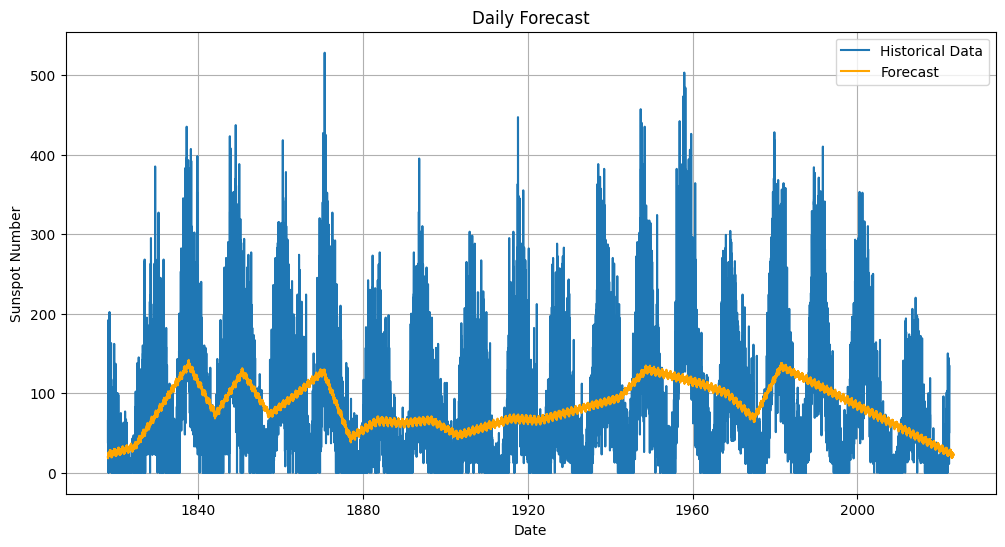

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/kvykmkzm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/vluvne1e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53747', 'data', 'file=/tmp/tmp9bk3k02s/kvykmkzm.json', 'init=/tmp/tmp9bk3k02s/vluvne1e.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modeldpt5ryb2/prophet_model-20241129144127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

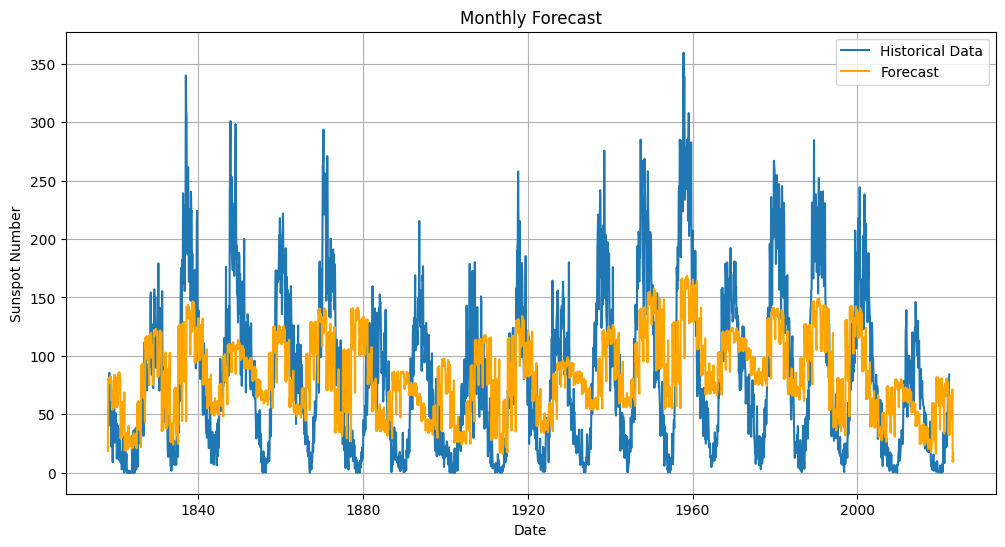

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/1jsdcxpy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/bbbph_3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79889', 'data', 'file=/tmp/tmp9bk3k02s/1jsdcxpy.json', 'init=/tmp/tmp9bk3k02s/bbbph_3s.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_model6ny3n0hv/prophet_model-20241129144128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

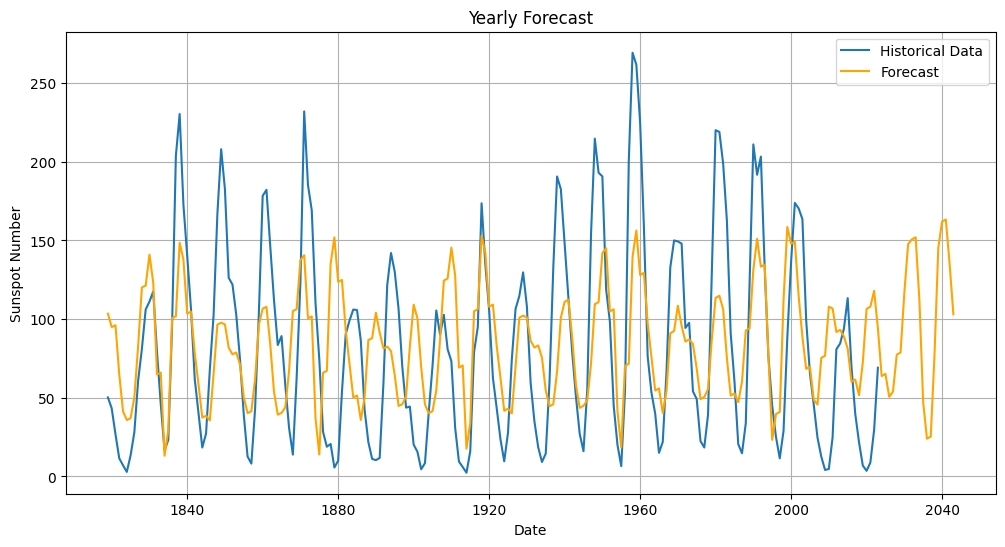


Evaluation Metrics for Each Model:
               MAE        MAPE        R²
Daily    56.513545         inf  0.159654
Monthly  46.815713         inf  0.282744
Yearly   43.719807  179.067076  0.275777

Daily Predictions (Last 10 Rows):
              ds      y       yhat
74613 2022-04-21  114.0  24.289370
74614 2022-04-22  110.0  24.180416
74615 2022-04-23  128.0  23.875991
74616 2022-04-24  127.0  23.767519
74617 2022-04-25  118.0  24.286070
74618 2022-04-26  132.0  24.570466
74619 2022-04-27  132.0  25.489588
74620 2022-04-28  135.0  25.997548
74621 2022-04-29  107.0  25.718469
74622 2022-04-30   51.0  26.000611

Monthly Predictions (Last 10 Rows):
             ds          y       yhat
2442 2021-07-31  34.258065  76.978251
2443 2021-08-31  22.000000  80.740006
2444 2021-09-30  51.300000  76.788914
2445 2021-10-31  37.354839  78.795848
2446 2021-11-30  34.766667  72.758933
2447 2021-12-31  67.451613  76.646456
2448 2022-01-31  53.967742  66.794018
2449 2022-02-28  59.678571  32.410950
2

In [29]:


# Define the function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MAPE": mape, "R²": r2}

# Resample data for monthly and yearly frequencies
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
monthly_data = prophet_data.resample('M', on='ds').mean().reset_index()
yearly_data = prophet_data.resample('Y', on='ds').mean().reset_index()

# Define datasets
datasets = {
    "Daily": prophet_data,
    "Monthly": monthly_data,
    "Yearly": yearly_data
}

# Store results
results = {}
forecast_tables = {}

# Train and forecast for each dataset
for frequency, data in datasets.items():
    # Initialize and train Prophet model
    model = Prophet()
    model.add_seasonality(name='custom_seasonality', period=30.5, fourier_order=10)  # Example seasonality
    model.fit(data)

    # Forecast future data
    future_periods = 365 if frequency == "Daily" else (12 if frequency == "Monthly" else 20)
    future_freq = 'D' if frequency == "Daily" else ('M' if frequency == "Monthly" else 'Y')
    future = model.make_future_dataframe(periods=future_periods, freq=future_freq)
    forecast = model.predict(future)

    # Merge predictions with historical data
    merged_data = data.merge(forecast[['ds', 'yhat']], on='ds', how='left')
    y_true = merged_data['y'].dropna()
    y_pred = merged_data['yhat'].iloc[:len(y_true)]

    # Store evaluation metrics
    metrics = calculate_metrics(y_true, y_pred)
    results[frequency] = metrics

    # Save forecast table
    forecast_tables[frequency] = merged_data[['ds', 'y', 'yhat']].tail(10)

    # Plot data
    plt.figure(figsize=(12, 6))
    plt.plot(data['ds'], data['y'], label='Historical Data')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.title(f'{frequency} Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.grid()
    plt.show()

# Display evaluation metrics
results_df = pd.DataFrame(results).T
print("\nEvaluation Metrics for Each Model:")
print(results_df)

# Display forecast tables
for frequency, table in forecast_tables.items():
    print(f"\n{frequency} Predictions (Last 10 Rows):")
    print(table)


<ipython-input-30-b37c11264bba>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = prophet_data.resample('M', on='ds').mean().reset_index()
<ipython-input-30-b37c11264bba>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = prophet_data.resample('Y', on='ds').mean().reset_index()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/9mqy707z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/l5d82yfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79071', 'data', 'file=/tmp/tmp9bk3k02s/9mqy707z.json', 'init=/tmp/tmp9bk3k02s/l5d82yfd.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelufqv6p6c/prophet_

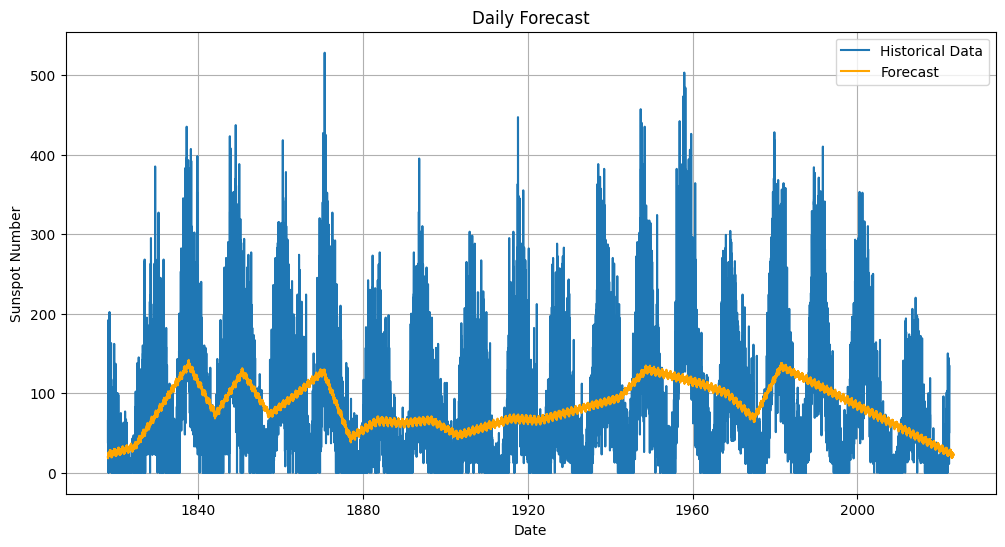


Evaluation Metrics for Each Model:
             MAE  MAPE        R²
Daily  56.513545   inf  0.159654

Daily Predictions (Last 10 Rows):
              ds      y       yhat
74613 2022-04-21  114.0  24.289370
74614 2022-04-22  110.0  24.180416
74615 2022-04-23  128.0  23.875991
74616 2022-04-24  127.0  23.767519
74617 2022-04-25  118.0  24.286070
74618 2022-04-26  132.0  24.570466
74619 2022-04-27  132.0  25.489588
74620 2022-04-28  135.0  25.997548
74621 2022-04-29  107.0  25.718469
74622 2022-04-30   51.0  26.000611


In [30]:


# Define the function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MAPE": mape, "R²": r2}

# Resample data for monthly and yearly frequencies
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
monthly_data = prophet_data.resample('M', on='ds').mean().reset_index()
yearly_data = prophet_data.resample('Y', on='ds').mean().reset_index()

# Define datasets
datasets = {
    "Daily": prophet_data,
}

# Store results
results = {}
forecast_tables = {}

# Train and forecast for each dataset
for frequency, data in datasets.items():
    # Initialize and train Prophet model
    model = Prophet()
    model.add_seasonality(name='custom_seasonality', period=30.5, fourier_order=10)  # Example seasonality
    model.fit(data)

    # Forecast future data
    future_periods = 365 if frequency == "Daily" else (12 if frequency == "Monthly" else 20)
    future_freq = 'D' if frequency == "Daily" else ('M' if frequency == "Monthly" else 'Y')
    future = model.make_future_dataframe(periods=future_periods, freq=future_freq)
    forecast = model.predict(future)

    # Merge predictions with historical data
    merged_data = data.merge(forecast[['ds', 'yhat']], on='ds', how='left')
    y_true = merged_data['y'].dropna()
    y_pred = merged_data['yhat'].iloc[:len(y_true)]

    # Store evaluation metrics
    metrics = calculate_metrics(y_true, y_pred)
    results[frequency] = metrics

    # Save forecast table
    forecast_tables[frequency] = merged_data[['ds', 'y', 'yhat']].tail(10)

    # Plot data
    plt.figure(figsize=(12, 6))
    plt.plot(data['ds'], data['y'], label='Historical Data')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.title(f'{frequency} Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sunspot Number')
    plt.legend()
    plt.grid()
    plt.show()

# Display evaluation metrics
results_df = pd.DataFrame(results).T
print("\nEvaluation Metrics for Each Model:")
print(results_df)

# Display forecast tables
for frequency, table in forecast_tables.items():
    print(f"\n{frequency} Predictions (Last 10 Rows):")
    print(table)


In [32]:
# Initialize Prophet model with custom changepoints
model = Prophet(n_changepoints=30, changepoint_prior_scale=0.1)
# Rename the columns to 'ds' and 'y' before fitting the model
sunspot_data = sunspot_data.rename(columns={'Date': 'ds', 'Sunspot_Number': 'y'})
model.fit(sunspot_data[['ds', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/c6ohfh8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/f9124mg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83052', 'data', 'file=/tmp/tmp9bk3k02s/c6ohfh8y.json', 'init=/tmp/tmp9bk3k02s/f9124mg_.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelm1zplltp/prophet_model-20241129144524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
# Create a future dataframe (e.g., predict for the next 365 days)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


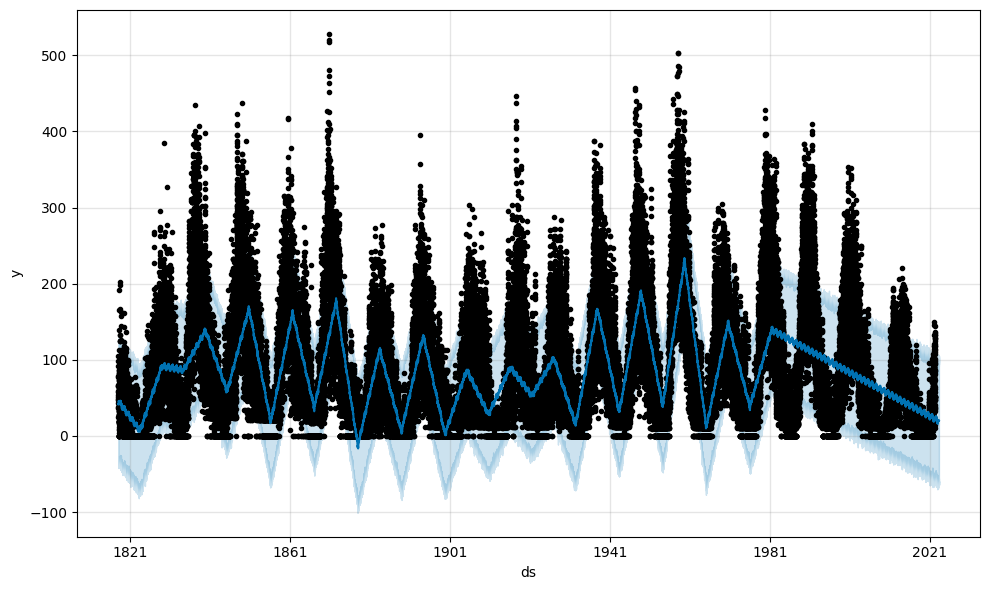

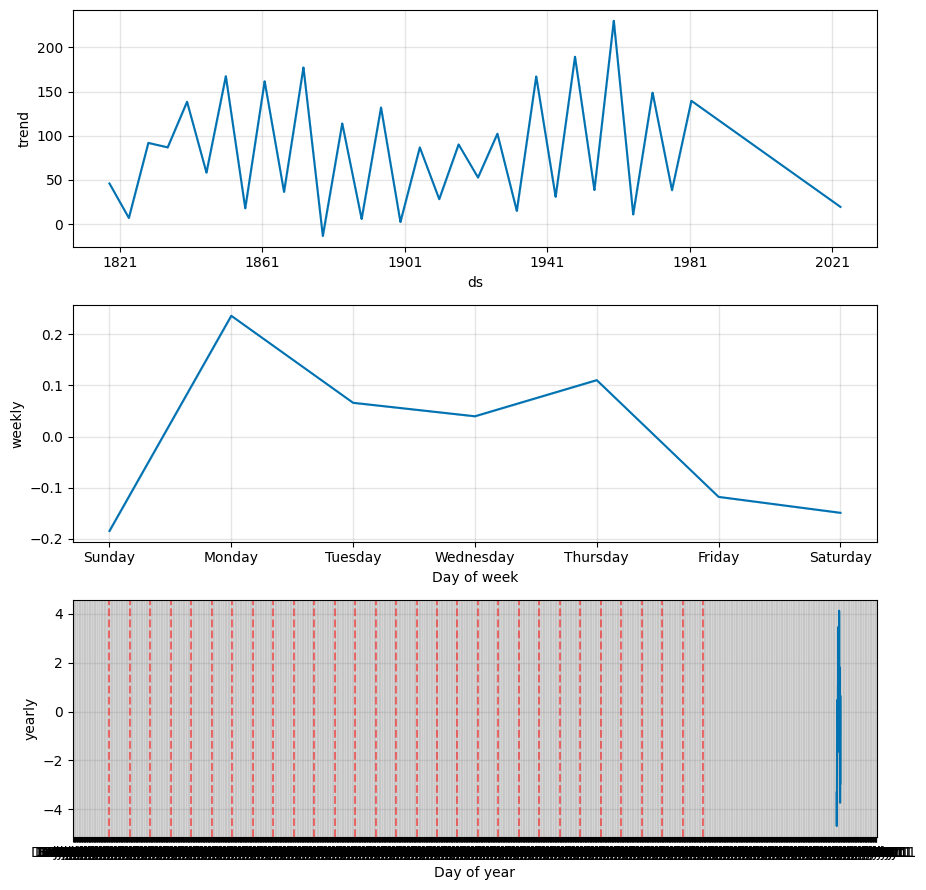

In [34]:
# Plot forecast including changepoints
fig = model.plot(forecast)
model.plot_components(forecast)

# Optional: Highlight detected changepoints
for changepoint in model.changepoints:
    plt.axvline(changepoint, color='red', linestyle='--', alpha=0.5)
plt.show()


In [35]:
model = Prophet(n_changepoints=20, changepoint_prior_scale=0.01)  # Fewer changepoints, less flexible trend
model.fit(sunspot_data[['ds', 'y']])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/1fqwn4qt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/8wcrsx2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34651', 'data', 'file=/tmp/tmp9bk3k02s/1fqwn4qt.json', 'init=/tmp/tmp9bk3k02s/8wcrsx2w.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelj7tx8o80/prophet_model-20241129144951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


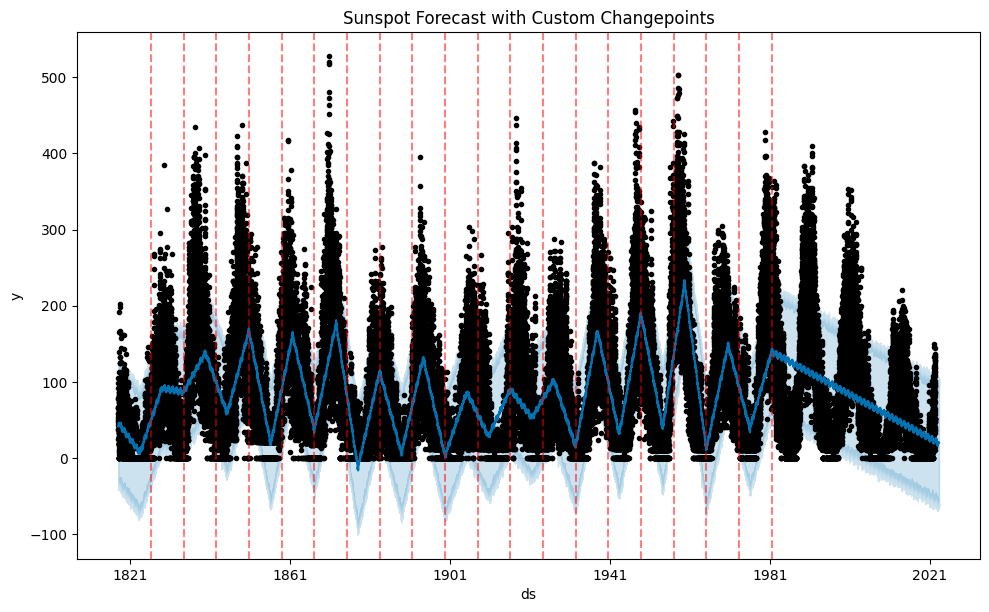

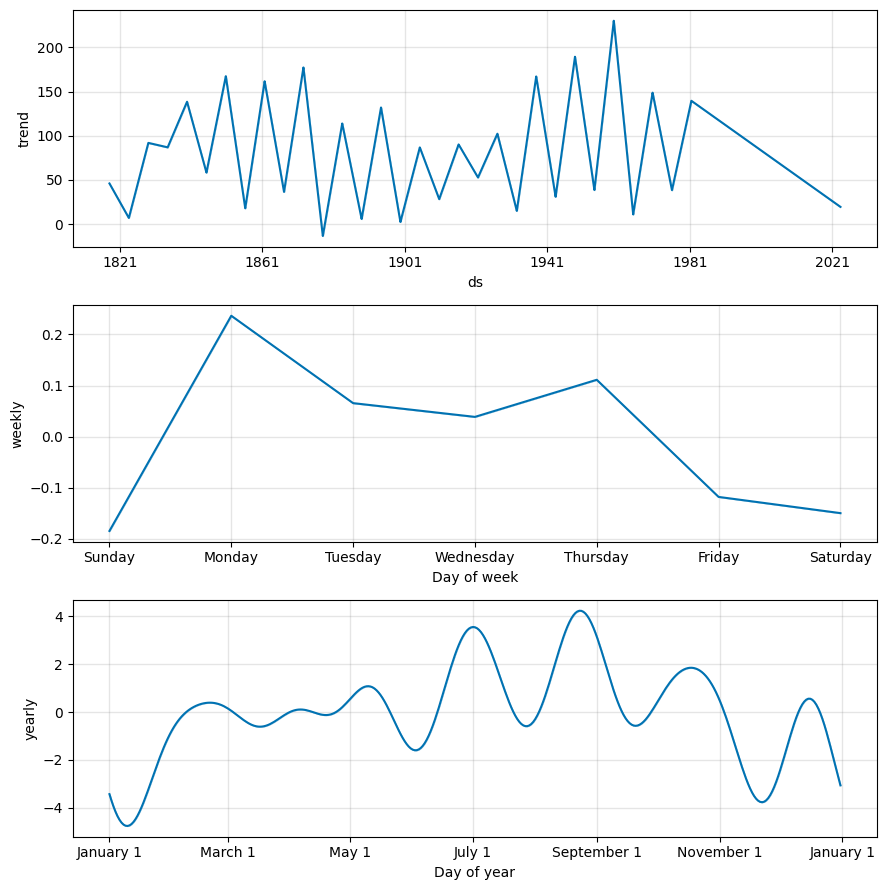

In [36]:
fig = model.plot(forecast)
plt.title("Sunspot Forecast with Custom Changepoints")
plt.grid()

# Highlight changepoints
for changepoint in model.changepoints:
    plt.axvline(changepoint, color='red', linestyle='--', alpha=0.5)

plt.show()

# Plot the components of the forecast
fig_components = model.plot_components(forecast)
plt.show()

##Seosonality##

In [37]:
# Initialize the Prophet model
model = Prophet(yearly_seasonality=False)  # Disable default yearly seasonality

# Add custom seasonality (e.g., monthly and weekly)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3)


In [39]:
# Fit the model
model.fit(sunspot_data[['ds', 'y']])

# Create future dataframe (e.g., predict next 365 days)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/9uvz7806.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bk3k02s/cesezkd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80164', 'data', 'file=/tmp/tmp9bk3k02s/9uvz7806.json', 'init=/tmp/tmp9bk3k02s/cesezkd3.json', 'output', 'file=/tmp/tmp9bk3k02s/prophet_modelr_ob4kzq/prophet_model-20241129145425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


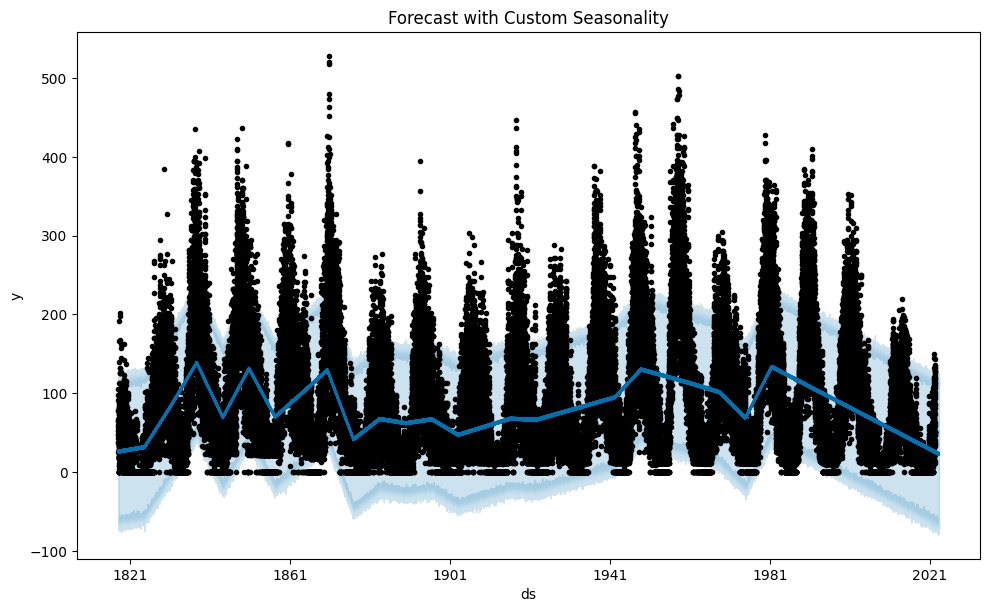

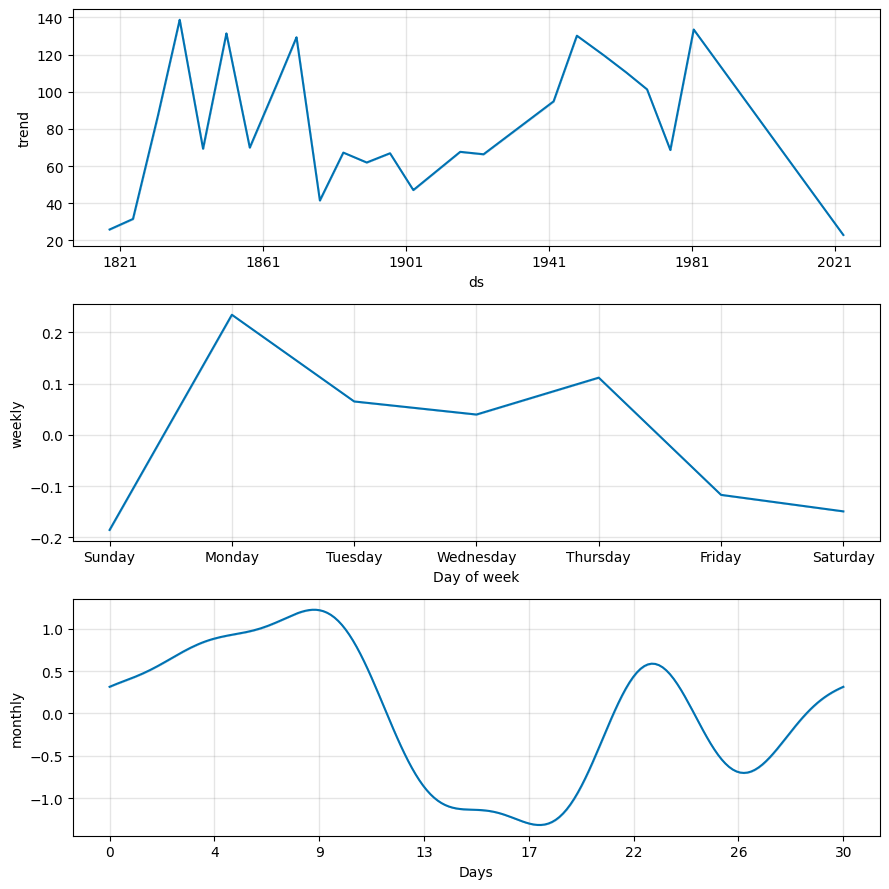

In [40]:
# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecast with Custom Seasonality")
plt.grid()
plt.show()

# Plot components to see how seasonality contributes
fig_components = model.plot_components(forecast)
plt.show()
